In [1]:
import pandas as pd 
train = pd.read_csv('train.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 80 columns we must deal with including 'SalePrice' column.These columns are in 3 types : float,int or object 

Data Cleaning

In [3]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
float_only = train.select_dtypes(float)

In [5]:
columns_1 = float_only.columns

In [6]:
for cols in columns_1:
    train[cols] = train[cols].fillna(train[cols].mean())

we fill the missing values in the columns which are float type with their mean value

In [7]:
int_only = train.select_dtypes(int)

In [8]:
int_null = int_only.isnull().sum()
int_null_1 = int_null[int_null > 0]

There are no missing values for columns which are int type 

In [9]:
object_only = train.select_dtypes(object)

In [10]:
object_null = object_only.isnull().sum()
object_null_1 = object_null[object_null > 0]
object_null_1


Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Above these are the columns which are object type but have more than 1 missing values 

Because twol columns ['MasVnrType','Electrical'] have small number of missing values so that we will use dropna() to drop the row which contains missing values

In [11]:
train = train.dropna(subset=['MasVnrType','Electrical'])

For these other missing values columns we will drop it out of our df 

In [12]:
object_null_1 = object_null_1.drop(['MasVnrType','Electrical'])
object_null_1

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
train = train.drop(object_null_1.index,axis=1)

Then we focus on these columns: YrSold,MoSold,YearBuilt: Original construction date,YearRemodAdd: Remodel date


In [14]:
years_sold = train['YrSold'] - train['YearBuilt']


In [15]:
years_since_remod = train['YrSold'] - train['YearRemodAdd']

In [16]:
years_since_remod_nega = years_since_remod[years_since_remod <0]
years_since_remod_nega


523   -1
dtype: int64

In [17]:
train = train.drop(523,axis=0)

## Create new columns
train['Years Before Sale'] = years_sold
train['Years Since Remod'] = years_since_remod

## No longer need original year columns
train = train.drop(["YearBuilt", "YearRemodAdd"], axis = 1)

Drop columns that: aren't useful for Machine Learning and leak data about the final sale

In [18]:
## Drop columns that leak info about the final sale
train = train.drop(["SaleCondition", "SaleType", "YrSold"], axis=1)

In [19]:
## Drop columns that aren't useful for ML
train = train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','EnclosedPorch','3SsnPorch','Utilities','LandContour','Street','KitchenAbvGr','GarageYrBlt','ScreenPorch','LandSlope','RoofMatl','Id'], axis=1)

These object columns contains more than 10 unique values that should be dropped

In [20]:
train = train.drop(['MSSubClass','Neighborhood','Exterior1st','Exterior2nd'],axis=1)

In [21]:
len(train.columns)

45

We have done the data cleaning process for our train df.Moverover,above is the  step for Pre_processing step for out ML model 

Next,we will do some Data Visualization for our df

In [22]:
train.head(10)

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,SalePrice,Years Before Sale,Years Since Remod
0,RL,65.000000,8450,Reg,Inside,Norm,Norm,1Fam,2Story,7,...,548,Y,0,61,0,0,2,208500,5,5
1,RL,80.000000,9600,Reg,FR2,Feedr,Norm,1Fam,1Story,6,...,460,Y,298,0,0,0,5,181500,31,31
2,RL,68.000000,11250,IR1,Inside,Norm,Norm,1Fam,2Story,7,...,608,Y,0,42,0,0,9,223500,7,6
3,RL,60.000000,9550,IR1,Corner,Norm,Norm,1Fam,2Story,7,...,642,Y,0,35,0,0,2,140000,91,36
4,RL,84.000000,14260,IR1,FR2,Norm,Norm,1Fam,2Story,8,...,836,Y,192,84,0,0,12,250000,8,8
5,RL,85.000000,14115,IR1,Inside,Norm,Norm,1Fam,1.5Fin,5,...,480,Y,40,30,0,700,10,143000,16,14
6,RL,75.000000,10084,Reg,Inside,Norm,Norm,1Fam,1Story,8,...,636,Y,255,57,0,0,8,307000,3,2
7,RL,70.049958,10382,IR1,Corner,PosN,Norm,1Fam,2Story,7,...,484,Y,235,204,0,350,11,200000,36,36
8,RM,51.000000,6120,Reg,Inside,Artery,Norm,1Fam,1.5Fin,7,...,468,Y,90,0,0,0,4,129900,77,58
9,RL,50.000000,7420,Reg,Corner,Artery,Artery,2fmCon,1.5Unf,5,...,205,Y,0,4,0,0,1,118000,69,58


MSZoning: Identifies the general zoning classification of the sale.

<AxesSubplot:ylabel='Frequency'>

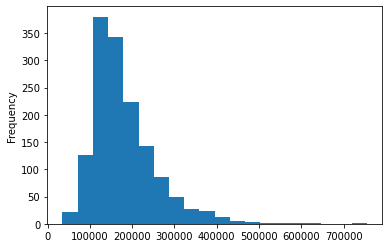

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train['SalePrice'].plot.hist(range =(34900.000000,755000.000000),bins = 20)

From the histogram above,SalePrice from 100000 to 200000 appear mostly in our data 

Below will be the stripplot chart that describe the frequency of SalePrice for each MSZoning 

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

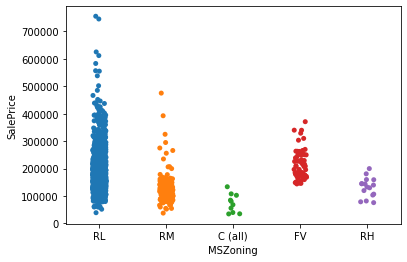

In [24]:
sns.stripplot(x='MSZoning',y='SalePrice',data = train,jitter= True )

RL(Residential Low Density) zone is the only one zone has some SalePrice above  500000 and when the SalePrice above 700000 we consider it as the Outliears 

We must remove those row contain outliears 

In [25]:
RL = train[(train['MSZoning'] == 'RL') & (train['SalePrice'] >= 600000)]
RL 

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,SalePrice,Years Before Sale,Years Since Remod
691,RL,104.0,21535,IR1,Corner,Norm,Norm,1Fam,2Story,10,...,832,Y,382,50,0,0,1,755000,13,12
898,RL,100.0,12919,IR1,Inside,Norm,Norm,1Fam,1Story,9,...,820,Y,0,67,0,0,3,611657,1,0
1169,RL,118.0,35760,IR1,CulDSac,Norm,Norm,1Fam,2Story,10,...,807,Y,361,76,0,0,7,625000,11,10
1182,RL,160.0,15623,IR1,Corner,Norm,Norm,1Fam,2Story,10,...,813,Y,171,78,555,0,7,745000,11,11


In [26]:
train = train.drop(RL.index,axis=0)

In [27]:
by_house_style = train.groupby('HouseStyle').agg({"SalePrice" :'sum'})
by_house_style =pd.DataFrame(by_house_style)
by_house_style.reset_index(inplace=True)
by_house_style

,HouseStyle,SalePrice
0,1.5Fin,22039978
1,1.5Unf,1542100
2,1Story,125921376
3,2.5Fin,1760000
4,2.5Unf,1730900
5,2Story,90503835
6,SFoyer,4997756
7,SLvl,10668220


Text(0.5, 1.0, 'Sum Sale price for each House Style')

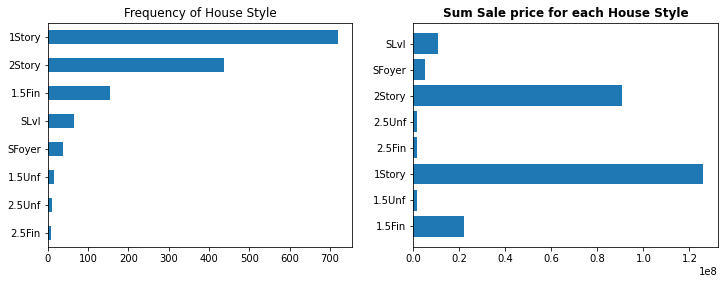

In [28]:
plt.figure(figsize=(12,14))

plt.subplot(3,2,1)
train['HouseStyle'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of House Style')

plt.subplot(3,2,2)
plt.barh(by_house_style['HouseStyle'],by_house_style['SalePrice'])
plt.title('Sum Sale price for each House Style', weight='bold')

Three house style : 1Story,2Story and 1 5 Fin are popular for customers 

In [29]:
train.head(6)

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,SalePrice,Years Before Sale,Years Since Remod
0,RL,65.0,8450,Reg,Inside,Norm,Norm,1Fam,2Story,7,...,548,Y,0,61,0,0,2,208500,5,5
1,RL,80.0,9600,Reg,FR2,Feedr,Norm,1Fam,1Story,6,...,460,Y,298,0,0,0,5,181500,31,31
2,RL,68.0,11250,IR1,Inside,Norm,Norm,1Fam,2Story,7,...,608,Y,0,42,0,0,9,223500,7,6
3,RL,60.0,9550,IR1,Corner,Norm,Norm,1Fam,2Story,7,...,642,Y,0,35,0,0,2,140000,91,36
4,RL,84.0,14260,IR1,FR2,Norm,Norm,1Fam,2Story,8,...,836,Y,192,84,0,0,12,250000,8,8
5,RL,85.0,14115,IR1,Inside,Norm,Norm,1Fam,1.5Fin,5,...,480,Y,40,30,0,700,10,143000,16,14


BldgType: Type of dwelling

Text(0.5, 1.07, 'The frequency of Bldg Type for each MSZoning ')

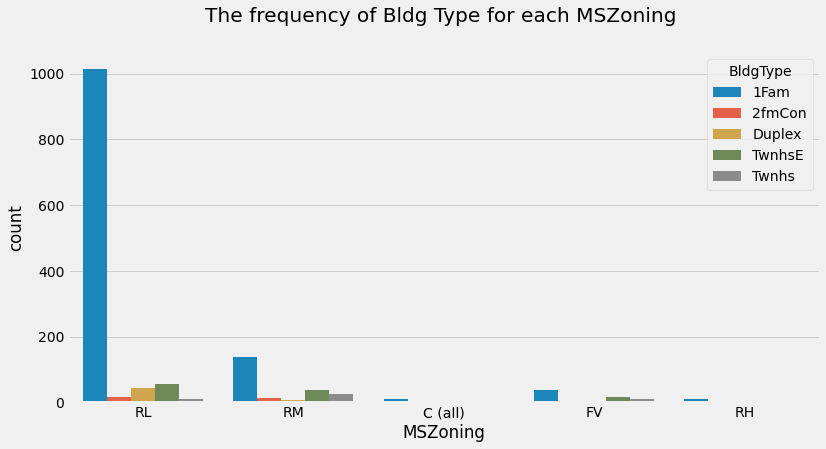

In [30]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
sns.countplot(x='MSZoning',hue='BldgType',data=train)
plt.title("The frequency of Bldg Type for each MSZoning ",
          y = 1.07) # the `y` parameter pads the title upward


For each zone from MSZoning,the most popular type of dwelling is 1Fam House 

In [31]:
train.head(5)

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,SalePrice,Years Before Sale,Years Since Remod
0,RL,65.0,8450,Reg,Inside,Norm,Norm,1Fam,2Story,7,...,548,Y,0,61,0,0,2,208500,5,5
1,RL,80.0,9600,Reg,FR2,Feedr,Norm,1Fam,1Story,6,...,460,Y,298,0,0,0,5,181500,31,31
2,RL,68.0,11250,IR1,Inside,Norm,Norm,1Fam,2Story,7,...,608,Y,0,42,0,0,9,223500,7,6
3,RL,60.0,9550,IR1,Corner,Norm,Norm,1Fam,2Story,7,...,642,Y,0,35,0,0,2,140000,91,36
4,RL,84.0,14260,IR1,FR2,Norm,Norm,1Fam,2Story,8,...,836,Y,192,84,0,0,12,250000,8,8


In [32]:
June = train.copy()[train['MoSold'] == 6]
May = train.copy()[train['MoSold'] == 5]

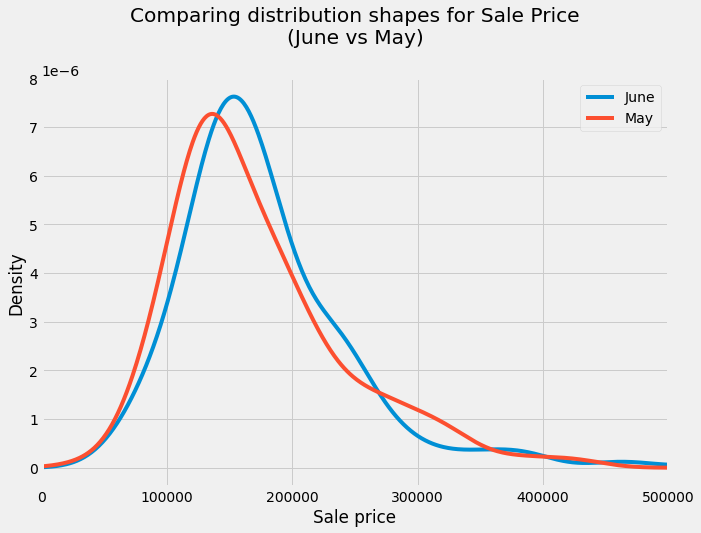

In [33]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

June['SalePrice'].plot.kde(label = 'June', legend = True, figsize = (10,7))
May['SalePrice'].plot.kde(label = 'May', legend = True)

plt.title("Comparing distribution shapes for Sale Price\n(June vs May)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Sale price')
plt.xlim(0,500000) 
plt.xticks(arange(0,500010,100000))


plt.show()

For two months : June and May,the value of Sale Price from 100000 to 200000 has the highest density 

In [34]:
June_mean = June['SalePrice'].mean()
May_mean = May['SalePrice'].mean()

June_median = June['SalePrice'].median()
May_median = May['SalePrice'].median()

June_mode = June['SalePrice'].mode()[0]
May_mode = May['SalePrice'].mode()[0]

summary = pd.DataFrame()
summary['June'] = [June_mean,June_median,June_mode]
summary['May'] = [May_mean,May_median,May_mode]
summary.index = ['mean', 'median', 'mode']
summary

,June,May
mean,177395.735178,171943.945274
median,163000.000000,153000.000000
mode,155000.000000,129000.000000


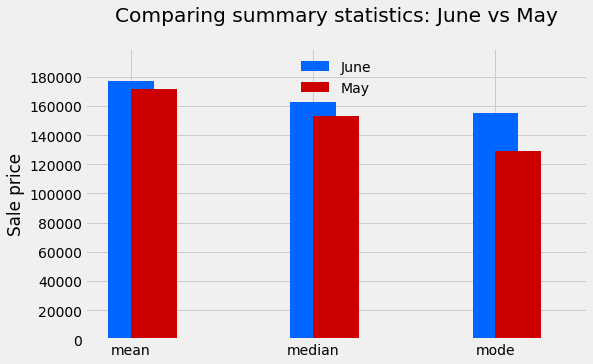

In [35]:
plt.style.use('fivethirtyeight')
summary['June'].plot.bar(color = '#0066FF', align = 'center', label = 'June', width = .25)
summary['May'].plot.bar(color = '#CC0000', align = 'edge', label = 'May', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: June vs May', y = 1.07)
plt.ylim(0,200000)
plt.yticks(arange(0,200000,20000))
plt.ylabel('Sale price')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Machine learning model 

In [36]:
train.head()

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,SalePrice,Years Before Sale,Years Since Remod
0,RL,65.0,8450,Reg,Inside,Norm,Norm,1Fam,2Story,7,...,548,Y,0,61,0,0,2,208500,5,5
1,RL,80.0,9600,Reg,FR2,Feedr,Norm,1Fam,1Story,6,...,460,Y,298,0,0,0,5,181500,31,31
2,RL,68.0,11250,IR1,Inside,Norm,Norm,1Fam,2Story,7,...,608,Y,0,42,0,0,9,223500,7,6
3,RL,60.0,9550,IR1,Corner,Norm,Norm,1Fam,2Story,7,...,642,Y,0,35,0,0,2,140000,91,36
4,RL,84.0,14260,IR1,FR2,Norm,Norm,1Fam,2Story,8,...,836,Y,192,84,0,0,12,250000,8,8


At the beginning ,we have done pre_processing our data with remove missing values columns or remove columns that not usefull for our ML model.Now we must do the Feature Transfrom step for ML model

In [37]:
only_object = train.select_dtypes('object')
list_1 = only_object.columns

In [38]:
list_1

Index(['MSZoning', 'LotShape', 'LotConfig', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'PavedDrive'],
      dtype='object')

Transform the 'Object ' columns to many 'Categorical' columns 

In [39]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
for col in list_1:
    train = create_dummies(train,col)
    train = train.drop(col,axis=1)

Convert 'float' columns to 'int' columns 

In [40]:
only_float = train.select_dtypes('float')
list_2 = only_float.columns

In [41]:
print(train[list_2].describe(include='all',percentiles=[]))

       LotFrontage   MasVnrArea
count  1446.000000  1446.000000
mean     69.850511   101.300830
std      21.825405   174.332614
min      21.000000     0.000000
50%      70.049958     0.000000
max     313.000000  1600.000000


In [42]:
only_int = train.select_dtypes('int')
list_3 = only_int.columns
list_3 = list_3.drop('SalePrice')

In [43]:
print(train[list_3].describe(include='all',percentiles=[]))

             LotArea  OverallQual  OverallCond  TotalBsmtSF     1stFlrSF  \
count    1446.000000  1446.000000  1446.000000  1446.000000  1446.000000   
mean    10457.053250     6.080913     5.580913  1051.499308  1157.139004   
std      9952.356322     1.366311     1.114868   430.331308   377.475438   
min      1300.000000     1.000000     1.000000     0.000000   334.000000   
50%      9452.500000     6.000000     5.000000   990.000000  1085.500000   
max    215245.000000    10.000000     9.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  ...  \
count  1446.000000  1446.000000   1446.000000   1446.000000  1446.000000  ...   
mean    342.912863  1505.952974      0.422545      0.057400     1.558091  ...   
std     430.074366   505.314794      0.518732      0.238559     0.545900  ...   
min       0.000000   334.000000      0.000000      0.000000     0.000000  ...   
50%       0.000000  1458.000000      0.000000      0.000000   

Looking at our numeric columns,we can see a big differences between the range of each column.For example,BsmtFullBath has values between 0-3 but PoolArea has values between 0 to 738.In order to make these values are equally weighted within our model,we need to rescale the data 

In [44]:
features = train.columns
features = features.drop('SalePrice')

In [45]:
features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y'],
      dtype='object', length=126)

In [46]:
all_X = train[features]
all_y = train['SalePrice']

In [48]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    lr = linear_model.LinearRegression()
    half_len = len(df) /2
    if k == 0:
        train = df[:half_len]
        test = df[half_len:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:half_len]
        test = df[half_len:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse
rmse = train_and_test(train,k=5)

[25791.89320203558, 27430.548901076192, 30497.287267184744, 47002.88252264341, 27765.293161319398]


The rmse is extremely high

C:\Users\Admin\AppData\Local\Temp\ipykernel_12088\3877122323.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


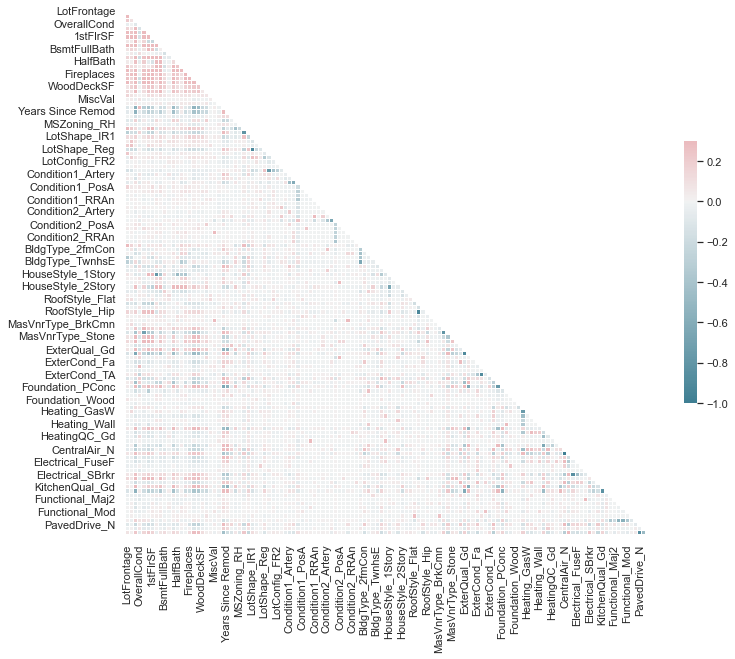

In [49]:
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

plot_correlation_heatmap(train[features])

It seem like there is no collinearity between features 

We use RFECV to select the best features that fit out model 

In [52]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

all_X = train[features]
all_y = train["SalePrice"]
lr = LinearRegression()
selector = RFECV(lr,cv=20)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]

In [54]:
len(optimized_columns)

118

In [56]:

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    lr = linear_model.LinearRegression()
    half_len = len(df) /2
    if k == 0:
        train = df[:half_len]
        test = df[half_len:]

        lr.fit(train[optimized_columns], train["SalePrice"])
        predictions = lr.predict(test[optimized_columns])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:half_len]
        test = df[half_len:]
        
        lr.fit(train[optimized_columns], train["SalePrice"])
        predictions_one = lr.predict(test[optimized_columns])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[optimized_columns], test["SalePrice"])
        predictions_two = lr.predict(train[optimized_columns])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[optimized_columns], train["SalePrice"])
            predictions = lr.predict(test[optimized_columns])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse
rmse = train_and_test(train,k=5)

rmse.mean()

[30743.565194930787, 26410.174810674864, 26022.407895569493, 43293.93815469273, 27354.743273633914]


30764.965865900354

for cross_validation = 5,our Rmse is nearly 30764.97 which is not to high 

Our rmse when using optimized_columns has been decreased a lot 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_model(df,features):
    
    all_X = df[features]
    all_y = df["SalePrice"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(train,optimized_columns)

KNeighborsClassifier
--------------------


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best Score: 0.013845785440613026
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best Score: 0.01798850574712644
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 9}



In [65]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1446, dtype: int64

Beside using LinearRegression for our ML model,we can use RandomForestClassifier 

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
model = RandomForestClassifier(criterion='gini',max_depth=10,max_features='log2',min_samples_leaf=8,min_samples_split=2,n_estimators=9)
scores = cross_val_score(model, all_X, all_y, cv=5)
predictions = cross_val_predict(lr,all_X,all_y, cv=10) 
predictions = pd.Series(predictions)
print(predictions)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0       216767.881784
1       165635.827732
2       222682.499469
3       187138.496972
4       276696.859198
            ...      
1441    184463.104318
1442    235119.336070
1443    258494.619375
1444    148022.625589
1445    167818.092354
Length: 1446, dtype: float64


Above is our predictions for SalePrice using RandomForestClassifier model with its best parameters.